In [7]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Set plot style
plt.style.use("seaborn-v0_8")

<Figure size 800x600 with 0 Axes>

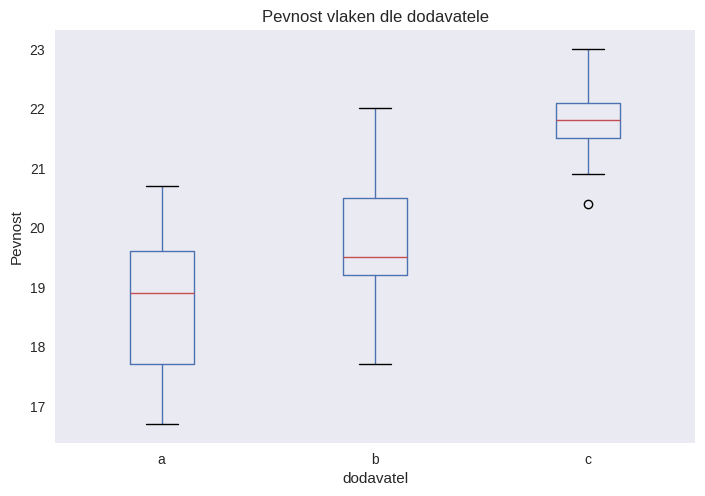

In [ ]:
# Load data and visualize
# Assuming whitespace separated, header present
pvl = pd.read_csv("pevnost_vlaken.txt", sep=r"\s+")

# Boxplot
plt.figure(figsize=(8, 6))
pvl.boxplot(column="pevnost", by="dodavatel", grid=False)
plt.title("Pevnost vlaken dle dodavatele")
plt.suptitle("")  # Suppress default pandas title
plt.ylabel("Pevnost")
plt.show()

In [ ]:
# One-way ANOVA
# Using statsmodels for ANOVA table similar to R's summary(aov)
model = ols("pevnost ~ C(dodavatel)", data=pvl).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq    df         F        PR(>F)
C(dodavatel)  116.099467   2.0  61.61302  2.538698e-16
Residual       67.836000  72.0       NaN           NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     a      b    0.868 0.0064 0.211 1.525   True
     a      c    2.964    0.0 2.307 3.621   True
     b      c    2.096    0.0 1.439 2.753   True
------------------------------------------------


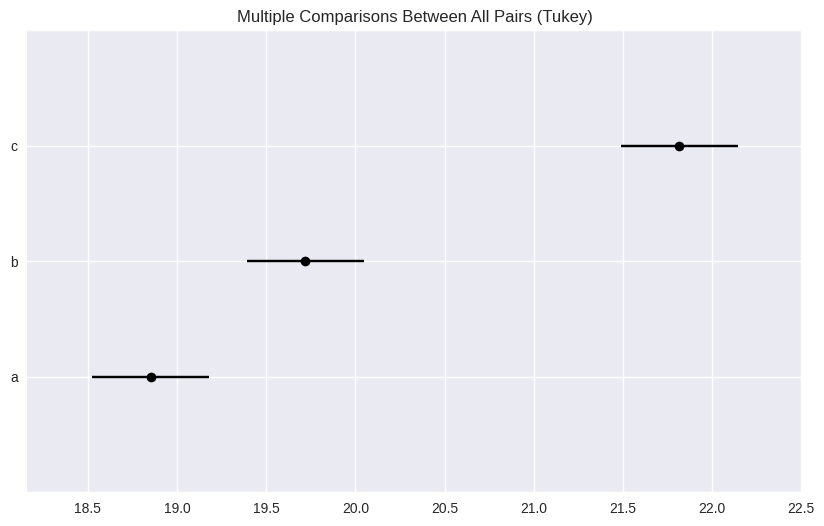

In [ ]:
# Tukey HSD post-hoc test
tukey = pairwise_tukeyhsd(endog=pvl["pevnost"], groups=pvl["dodavatel"], alpha=0.05)
print(tukey)

# Optional: Plot Tukey intervals
tukey.plot_simultaneous()
plt.show()

In [ ]:
# Pairwise t-test with Bonferroni correction
# Using statsmodels MultiComparison for a streamlined approach
mc = MultiComparison(pvl["pevnost"], pvl["dodavatel"])

# allpairtest runs the t-test (stats.ttest_ind) for all pairs and applies Bonferroni correction
result = mc.allpairtest(stats.ttest_ind, method="bonf")

print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
     a      b  -2.7494 0.0084    0.0252   True
     a      c -11.0827    0.0       0.0   True
     b      c  -8.9437    0.0       0.0   True
----------------------------------------------
